In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
dataset_dir = Path("../data/Online Retail.xlsx")
dataset_dir

PosixPath('../data/Online Retail.xlsx')

In [3]:
df = pd.read_excel(dataset_dir)

In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [19]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%Y%m%d")

<AxesSubplot:xlabel='date'>

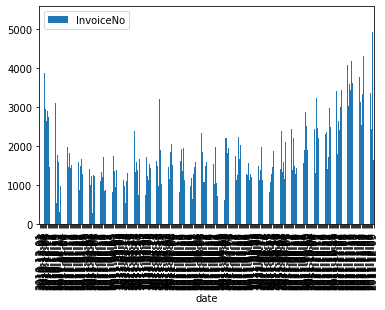

In [28]:
df['date'] = df.InvoiceDate.dt.date
df[['date', 'InvoiceNo']].groupby('date').count().plot(kind='bar')

In [39]:
df['month'] = df.InvoiceDate.dt.to_period('M')
df[['month', 'InvoiceNo']].groupby('month').count()

,InvoiceNo
month,
2010-12,42481
2011-01,35147
2011-02,27707
2011-03,36748
2011-04,29916
2011-05,37030
2011-06,36874
2011-07,39518
2011-08,35284


<AxesSubplot:xlabel='month'>

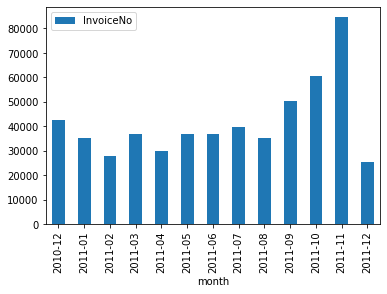

In [41]:
df[['month', 'InvoiceNo']].groupby('month').count().plot(kind='bar')

In [40]:
df['year'] = df.InvoiceDate.dt.to_period('Y')
df[['year', 'InvoiceNo']].groupby('year').count()

,InvoiceNo
year,
2010,42481
2011,499428


In [16]:
df.Description.value_counts()[:50]

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
ASSORTED COLOUR BIRD ORNAMENT          1501
SET OF 3 CAKE TINS PANTRY DESIGN       1473
PACK OF 72 RETROSPOT CAKE CASES        1385
LUNCH BAG  BLACK SKULL.                1350
NATURAL SLATE HEART CHALKBOARD         1280
POSTAGE                                1252
JUMBO BAG PINK POLKADOT                1251
HEART OF WICKER SMALL                  1237
JAM MAKING SET WITH JARS               1229
JUMBO STORAGE BAG SUKI                 1214
PAPER CHAIN KIT 50'S CHRISTMAS         1210
JUMBO SHOPPER VINTAGE RED PAISLEY      1202
LUNCH BAG CARS BLUE                    1197
LUNCH BAG SPACEBOY DESIGN              1192
JAM MAKING SET PRINTED                 1182
RECIPE BOX PANTRY YELLOW DESIGN        1180
SPOTTY BUNTING                         1172
LUNCH BAG SUKI DESIGN           

In [11]:
df.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [10]:
df.CustomerID.describe()

count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64

In [12]:
df.CustomerID.value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [5]:
df.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [13]:
df[["Country", "Quantity"]].groupby('Country').sum()

,Quantity
Country,
Australia,83653
Austria,4827
Bahrain,260
Belgium,23152
Brazil,356
Canada,2763
Channel Islands,9479
Cyprus,6317
Czech Republic,592


**Quantitative Questions**
- Which country has the highest ROI? 
- What are the top 10 stocks? How about their profitability? 
- Who are our future, largest potential partners? 
- What are the top-selling products?

**Qualitative Questions**
- Is there any preference for products we sell in a particular country when they buy our products? For example, are most of our French buyers looking into children's products? 
- Why do we have so many orders from the United Kingdom? 
- Why did we have fewer sales in Dec 2011 compared to Dec 2010? 
- Why did we experience a sell peak in November 2011? 